In [82]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
import matplotlib.pyplot as plt
berry_1 = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/GROUPED_GROWTH_DATA.csv")

In [58]:
berry_1

,STRG_DT,FRT_LNGTH,SGCN_PH_RATE,FRST_TREE_CNT,LEAF_LNGTH_LEAF_WDTH_RATE,ACCMLT_LEAF_CNT,LEAF_CNT_INCR_SPD,PLT_LNGTH,GRTH_LNGTH,LEAF_WDTH,...,BLMNG_CNT,SGCN,PH_LVL,FRT_WT,LEAF_LNGTH,NOT_BLMNG_CNT,LEAF_CNT,SHPMN_QTY,FRST_RATE,FRT_WT_WDTH_RATE
0,1/1/2022 0:00,4.41,15.90,5.0,1.41,6,0.0,32.53,21.47,72.2,...,1.21,9.86,0.62,19.03,10.15,0,6.50,350.0,4.13,5.38
1,1/2/2022 0:00,4.41,15.90,5.0,1.41,6,0.0,32.53,21.47,72.2,...,1.21,9.86,0.62,19.03,10.15,0,6.50,350.0,4.13,5.38
2,1/3/2022 0:00,4.41,15.90,5.0,1.41,6,0.0,32.53,21.47,72.2,...,1.21,9.86,0.62,19.03,10.15,0,6.50,350.0,4.13,5.38
3,1/4/2022 0:00,4.41,15.90,5.0,1.41,6,0.0,32.53,21.47,72.2,...,1.21,9.86,0.62,19.03,10.15,0,6.50,350.0,4.13,5.38
4,1/5/2022 0:00,4.41,15.90,5.0,1.41,6,0.0,32.53,21.47,72.2,...,1.21,9.86,0.62,19.03,10.15,0,6.50,350.0,4.13,5.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,6/26/2022 0:00,4.01,12.93,0.5,1.19,234,-1.6,41.77,31.58,77.4,...,3.82,9.44,0.73,18.67,9.47,0,6.38,301.0,0.13,5.56
177,6/27/2022 0:00,4.01,12.93,0.5,1.19,234,-1.6,41.77,31.58,77.4,...,3.82,9.44,0.73,18.67,9.20,0,5.50,301.0,0.13,5.56
178,6/28/2022 0:00,4.01,12.93,0.5,1.19,234,-1.6,41.77,31.58,77.4,...,3.82,9.44,0.73,18.67,9.20,0,5.50,301.0,0.13,5.56
179,6/29/2022 0:00,4.01,12.93,0.5,1.19,234,-1.6,41.77,31.58,77.4,...,3.82,9.44,0.73,18.67,9.20,0,5.50,301.0,0.13,5.56


In [65]:
new_df= berry_1["FRST_TREE_CNT"]
new_df = pd.DataFrame(new_df)
new_df['STRG_DT'] = pd.to_datetime(berry_1['STRG_DT'])

# 'STRG_DT' 열을 인덱스로 설정
new_df.set_index('STRG_DT', inplace=True)

new_df

,FRST_TREE_CNT
STRG_DT,
2022-01-01,5.0
2022-01-02,5.0
2022-01-03,5.0
2022-01-04,5.0
2022-01-05,5.0
...,...
2022-06-26,0.5
2022-06-27,0.5
2022-06-28,0.5


In [66]:
new_df.tail(10)

,FRST_TREE_CNT
STRG_DT,
2022-06-21,1.0
2022-06-22,1.0
2022-06-23,1.0
2022-06-24,0.5
2022-06-25,0.5
2022-06-26,0.5
2022-06-27,0.5
2022-06-28,0.5
2022-06-29,0.5


<Axes: xlabel='STRG_DT'>

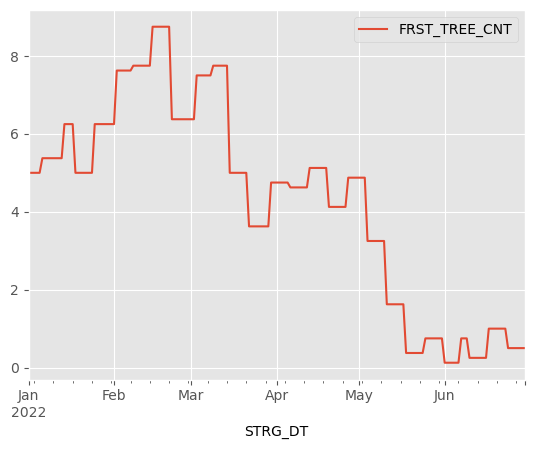

In [67]:
new_df.plot()

In [76]:
new =new_df.iloc[7:,:]

In [77]:
new

,FRST_TREE_CNT
STRG_DT,
2022-01-08,5.375
2022-01-09,5.375
2022-01-10,5.375
2022-01-11,5.375
2022-01-12,5.375
...,...
2022-06-26,0.500
2022-06-27,0.500
2022-06-28,0.500


In [78]:
new["tone"]=df.iloc[6:-1,:].values
new["ttwo"]=df.iloc[5:-2,:].values
new["tthree"]=df.iloc[4:-3,:].values
new["tfour"]=df.iloc[3:-4,:].values
new["tfive"]=df.iloc[2:-5,:].values
new["tsix"]=df.iloc[1:-6,:].values
new["tseven"]=df.iloc[0:-7,:].values


In [79]:
new

,FRST_TREE_CNT,tone,ttwo,tthree,tfour,tfive,tsix,tseven
STRG_DT,,,,,,,,
2022-01-08,5.375,5.375,5.375,5.000,5.000,5.000,5.000,5.0
2022-01-09,5.375,5.375,5.375,5.375,5.000,5.000,5.000,5.0
2022-01-10,5.375,5.375,5.375,5.375,5.375,5.000,5.000,5.0
2022-01-11,5.375,5.375,5.375,5.375,5.375,5.375,5.000,5.0
2022-01-12,5.375,5.375,5.375,5.375,5.375,5.375,5.375,5.0
...,...,...,...,...,...,...,...,...
2022-06-26,0.500,0.500,0.500,1.000,1.000,1.000,1.000,1.0
2022-06-27,0.500,0.500,0.500,0.500,1.000,1.000,1.000,1.0
2022-06-28,0.500,0.500,0.500,0.500,0.500,1.000,1.000,1.0


In [80]:
# 모델 초기화
model = sm.OLS.from_formula('FRST_TREE_CNT ~ tone + ttwo + tthree + tfour + tfive +tsix +tseven', new)
result= model.fit()


# 회귀 계수 출력
print('회귀 계수:')
print(result.params)


회귀 계수:
Intercept    0.005901
tone         0.993144
ttwo         0.000123
tthree      -0.008517
tfour       -0.022062
tfive        0.030789
tsix        -0.017786
tseven       0.016077
dtype: float64


In [81]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          FRST_TREE_CNT   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     806.3
Date:                Sat, 23 Sep 2023   Prob (F-statistic):          1.29e-124
Time:                        16:56:36   Log-Likelihood:                -107.03
No. Observations:                 174   AIC:                             230.1
Df Residuals:                     166   BIC:                             255.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0059      0.070      0.084      0.933      -0.132       0.144
tone           0.9931      0.078     12.798      0.000       0.840       1.146
ttwo           0.0001      0.109      0.001      0.999      -0.216       0.216
tthree        -0.0085      0.109     -0.078      0.938      -0.224       0.207
tfour         -0.0221      0.109     -0.202      0.840      -0.237       0.193
tfive          0.0308      0.109      0.282      0.778      -0.185       0.246
tsix          -0.0178      0.109     -0.163      0.871      -0.233       0.198
tseven         0.0161      0.078      0.206      0.837      -0.138       0.170
==============================================================================
Omnibus:                      118.672   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1484.609
Skew:                          -2.294   Prob(JB):                         0.00
Kurtosis:                      16.554   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
print("FRST_TREE_CNT  = ", end ='')
for i in range(8) : 
    if i==0 :
        print("(",result.params[i],")","+")
    elif 1<= i <= 6 :
        print("(", result.params[i],")", new.columns[i], "+")
    else: 
        print("(",result.params[i],")", new.columns[i])

FRST_TREE_CNT  = ( 0.005901297515769252 ) +
( 0.9931436826395081 ) tone +
( 0.00012334496930365723 ) ttwo +
( -0.008516521116124984 ) tthree +
( -0.022061814355371044 ) tfour +
( 0.030789426343733908 ) tfive +
( -0.017786402247329712 ) tsix +
( 0.016077476639121246 ) tseven


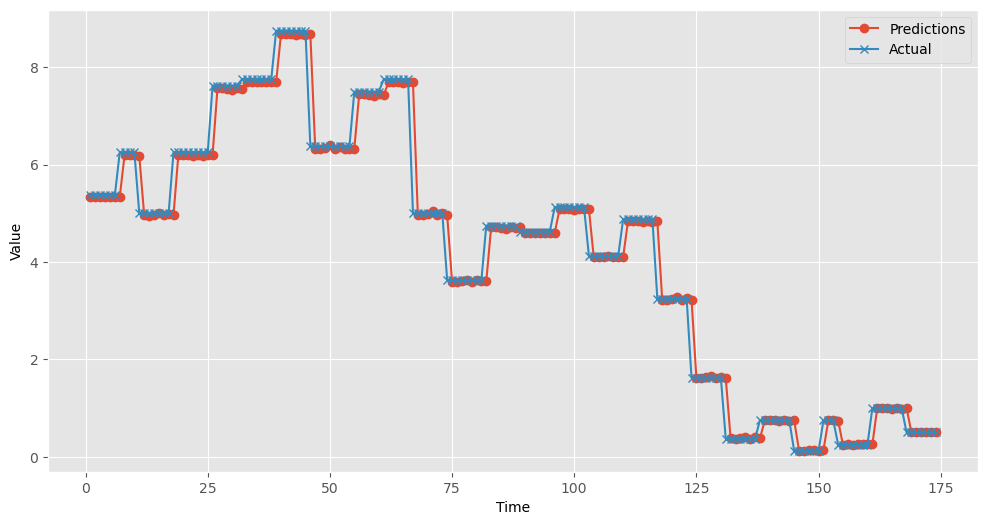

In [109]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,6)
time = np.arange(1, 175)

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot(time, result.predict(), label='Predictions', marker='o')
plt.plot(time, new["FRST_TREE_CNT"].values, label='Actual', marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# 참고용

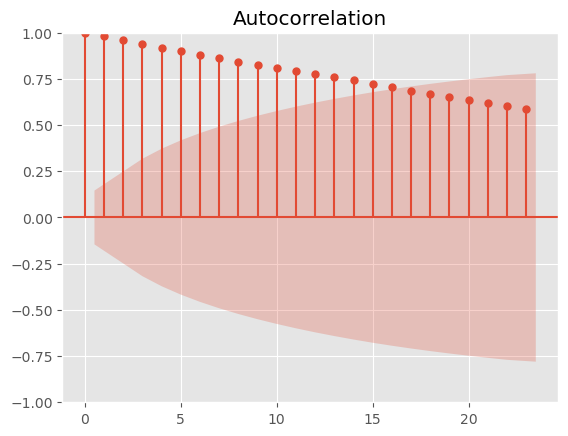

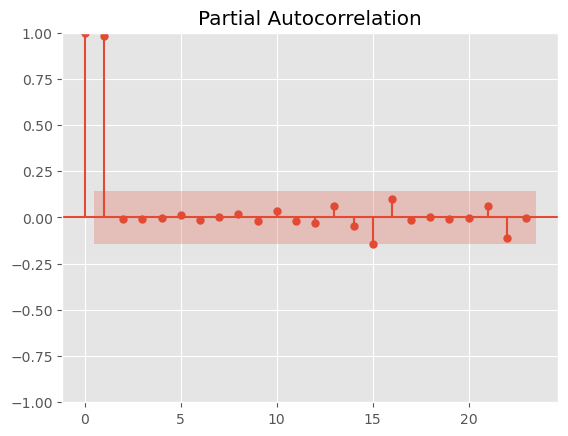

In [84]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(new_df)
plot_pacf(new_df)
plt.show()

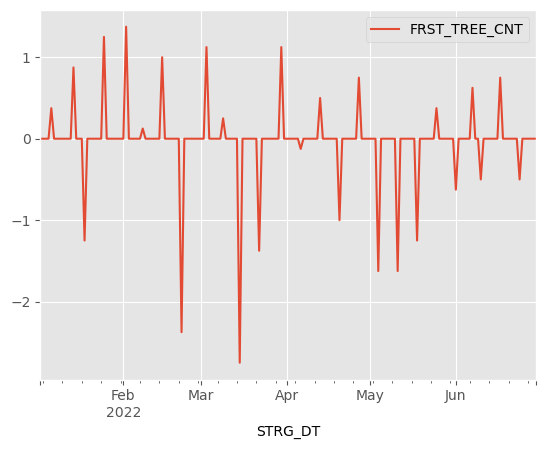

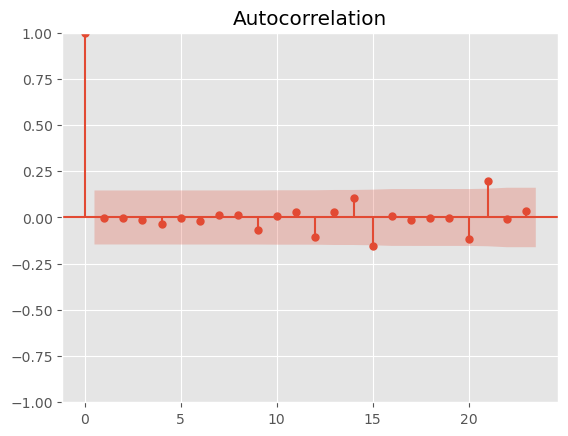

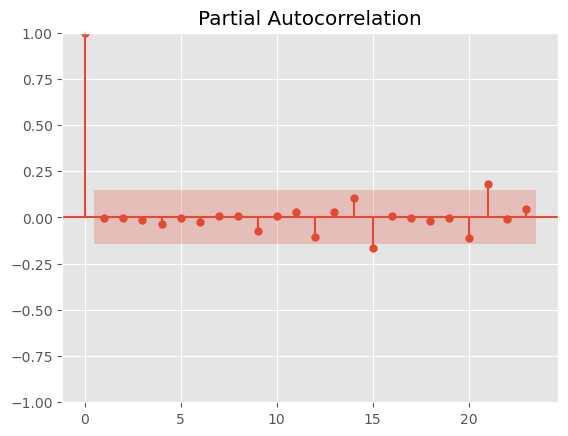

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=new_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [150]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          FRST_TREE_CNT   No. Observations:                  181
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -108.744
Date:                Wed, 20 Sep 2023   AIC                            221.489
Time:                        19:37:36   BIC                            227.875
Sample:                    01-01-2022   HQIC                           224.078
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -1.328e-06   1.33e+04     -1e-10      1.000    -2.6e+04     2.6e+04
sigma2         0.1960      0.010     19.253      0.000       0.176       0.216
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [151]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          FRST_TREE_CNT   No. Observations:                  181
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -108.744
Date:                Wed, 20 Sep 2023   AIC                            219.489
Time:                        19:37:36   BIC                            222.682
Sample:                    01-01-2022   HQIC                           220.784
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1960      0.007     27.648      0.000       0.182       0.210
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1760.98
Prob(Q):                              0.97   Pr

In [152]:
# 예측을 위한 ARIMA 모델 정의
model = sm.tsa.ARIMA(train_data, order=(0, 1, 0))
results = model.fit()

# 예측 시작 및 종료 날짜 설정 (예: 2022-07-01부터 2022-12-31까지)
start_date = '2022-05-25'
end_date = '2022-06-30'

# 예측 수행
predictions = results.predict(start=start_date, end=end_date, typ='levels')

# 예측 결과 출력
print(predictions)


2022-05-25    0.375
2022-05-26    0.375
2022-05-27    0.375
2022-05-28    0.375
2022-05-29    0.375
2022-05-30    0.375
2022-05-31    0.375
2022-06-01    0.375
2022-06-02    0.375
2022-06-03    0.375
2022-06-04    0.375
2022-06-05    0.375
2022-06-06    0.375
2022-06-07    0.375
2022-06-08    0.375
2022-06-09    0.375
2022-06-10    0.375
2022-06-11    0.375
2022-06-12    0.375
2022-06-13    0.375
2022-06-14    0.375
2022-06-15    0.375
2022-06-16    0.375
2022-06-17    0.375
2022-06-18    0.375
2022-06-19    0.375
2022-06-20    0.375
2022-06-21    0.375
2022-06-22    0.375
2022-06-23    0.375
2022-06-24    0.375
2022-06-25    0.375
2022-06-26    0.375
2022-06-27    0.375
2022-06-28    0.375
2022-06-29    0.375
2022-06-30    0.375
Freq: D, Name: predicted_mean, dtype: float64


In [153]:
predictions.values

array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
       0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
       0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
       0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
       0.375])

In [154]:
test_data = berry_1.iloc[144:,:]["FRST_TREE_CNT"]

In [155]:
test_data.values

array([0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.75 , 0.75 , 0.75 , 0.25 , 0.25 ,
       0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  ,
       0.5  ])

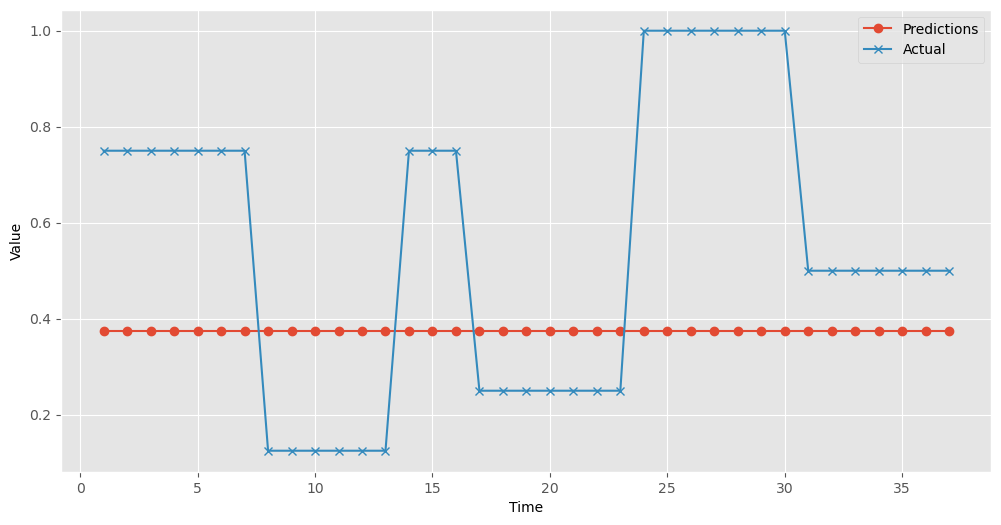

In [156]:
import matplotlib.pyplot as plt

# 시간 배열 생성 (예시로 1부터 100까지)
time = np.arange(1, 38)

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot(time, predictions.values, label='Predictions', marker='o')
plt.plot(time, test_data.values, label='Actual', marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [158]:


# 예측값과 실제값 비교
from sklearn.metrics import mean_squared_error

# 예측값과 테스트 데이터 간의 MSE 계산
mse = mean_squared_error(test_data.values, predictions.values)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.12795608108108109


In [ ]:
적어도 3개년은..

In [ ]:
10일 기준
split 하지말고
train 전체 
예측말고 적합용으로 한번만 
